# Optimizing Image Classification with CNNs and Transfer Learning: A Deep Dive into FoodVision-10

This project demonstrates advanced deep learning techniques applied to image classification using the **FoodVision-10 dataset**. FoodVision-10 is a refined subset of the well-known Food-101 dataset, featuring images from 10 specific food categories. By focusing on these 10 classes, the project simplifies the classification challenge while maintaining complexity in terms of preprocessing and model optimization.

## Key Highlights:
- **Dataset Handling:** 
  - Preprocessing and augmenting the **FoodVision-10** dataset, which contains food images of varying dimensions and qualities.
- **Custom Model Development:**
  - Designing and evaluating **4 different custom Convolutional Neural Network (CNN) models**, experimenting with various hyperparameters to optimize performance.
  - Implementing **transfer learning** using three distinct approaches:
    1. **Feature extraction:** Leveraging pre-trained models to extract key features for classification.
    2. **Feature extraction with data augmentation:** Enhancing generalization by augmenting the input data.
    3. **Fine-tuning with data augmentation:** Unfreezing specific layers in the pre-trained models to improve performance further.
- **Training Optimization:**
  - Building efficient data pipelines with **batching, caching, and prefetching** to streamline the training process.

## Objectives:
Through this project, I aim to:
1. Illustrate advanced techniques in dataset preparation and augmentation for image classification.
2. Showcase the integration of custom CNN models and pre-trained models for real-world computer vision tasks.
3. Highlight the significance of transfer learning with feature extraction, data augmentation, and fine-tuning in deep learning pipelines.
4. Experiment with custom architectures by tuning hyperparameters to achieve optimal model performance.

This work reflects a combination of theory and hands-on practices, offering a complete framework for tackling image classification tasks efficiently and effectively.

## 1. Dataset Overview - FoodVision-10

### About the Original Dataset (Food-101 dataset)
The **Food-101 dataset** (available [here on Kaggle](https://www.kaggle.com/datasets/kmader/food41)) contains:
- **100 Classes**: Each class represents a unique food item, such as `apple_pie`, `sushi`, and `hamburger`.
- **Number of Images**:
  - **Training Set**: 750 images per class, for a total of 75,000 images.
  - **Validation Set**: 250 images per class, for a total of 25,000 images.
  - **Total Images**: 100,000 images (train + validation).
- **Image Characteristics**: The images have variable dimensions, requiring preprocessing to resize and normalize them before training.

### **Our Dataset: FoodVision-10**

The **FoodVision-10 dataset** is a subset of the **Food-101 dataset**. It was created by extracting **10 diverse classes** from the original 100 classes in Food-101 using a custom data preparation script that I developed. The script can be found in the project directory.  
These classes represent a variety of foods, including desserts, main dishes, and snacks, making the dataset ideal for efficient training and experimentation.

#### Chosen Classes
The following 10 classes were selected for this project:
1. **apple_pie**
2. **baby_back_ribs**
3. **baklava**
4. **bibimbap**
5. **caprese_salad**
6. **cheesecake**
7. **chocolate_cake**
8. **french_fries**
9. **hamburger**
10. **sushi**

#### Key Details:
- **Source**: Derived from the Food-101 dataset.
- **Number of Classes**: 10 (out of the original 100 classes).
- **Images Per Class**:
  - **Training Set**: 750 images per class (7,500 total).
  - **Validation Set**: 250 images per class (2,500 total).
- **Total Images**: 10,000 (train + validation).  
> **Note**: The directory labeled as "test" in the folder structure actually represents our validation dataset and is used solely for validation purposes.

#### Why FoodVision-10?
FoodVision-10 was designed to:
1. **Optimize Computational Resources**: Training on 10 classes instead of 100 reduces GPU and memory demands, making it manageable (10,000 images total) without compromising diversity.
2. **Speed Up Prototyping**: Smaller datasets enable faster experimentation with techniques like transfer learning and mixed precision training.
3. **Retain Visual Variety**: The selected classes cover a wide range of colors, textures, and patterns, ensuring the dataset remains challenging and meaningful for deep learning models.

#### Folder Structure

The dataset is organized into the following structure:

In [1]:
"""
10_food_classes_all_data/   <- top-level folder  
│  
├── train/                  <- training images  
│   ├── apple_pie/          <- apple_pie training folder  
│   │   ├── 1001001.jpg  
│   │   ├── 1001002.jpg  
│   │   └── ...  
│   ├── baby_back_ribs/     <- baby_back_ribs training folder  
│   │   ├── 1002001.jpg  
│   │   ├── 1002002.jpg  
│   │   └── ...  
│   └── ...  
│  
├── test/                    <- validation images  
│   ├── apple_pie/          <- apple_pie validation folder  
│   │   ├── 1003001.jpg  
│   │   ├── 1003002.jpg  
│   │   └── ...  
│   ├── baby_back_ribs/     <- baby_back_ribs validation folder  
│   │   ├── 1004001.jpg  
│   │   ├── 1004002.jpg  
│   │   └── ...  
│   └── ...  
"""
pass

This structure ensures a clean separation of training and testing data, simplifying the process of creating data pipelines.

## 2. Data Inspection

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from helper_functions import view_random_images

In [2]:
# Define the path to your dataset
data_dir = "food_vision_10"

# Print the folder structure
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'food_vision_10'.
There are 10 directories and 0 images in 'food_vision_10/test'.
There are 0 directories and 250 images in 'food_vision_10/test/cheesecake'.
There are 0 directories and 250 images in 'food_vision_10/test/apple_pie'.
There are 0 directories and 250 images in 'food_vision_10/test/sushi'.
There are 0 directories and 250 images in 'food_vision_10/test/bibimbap'.
There are 0 directories and 250 images in 'food_vision_10/test/chocolate_cake'.
There are 0 directories and 250 images in 'food_vision_10/test/hamburger'.
There are 0 directories and 250 images in 'food_vision_10/test/baby_back_ribs'.
There are 0 directories and 250 images in 'food_vision_10/test/french_fries'.
There are 0 directories and 250 images in 'food_vision_10/test/caprese_salad'.
There are 0 directories and 250 images in 'food_vision_10/test/baklava'.
There are 10 directories and 0 images in 'food_vision_10/train'.
There are 0 directories and 750 images in 'food_visi

### **Exploring Image Sizes and Pixels Range**

We will use the `check_image_shapes_and_ranges` helper function, which we coded in the `helper_functions` script.  
This function takes a data directory as input and returns three outputs:
1. A list of all image shapes in the dataset.
2. A counter object summarizing the frequency of each image shape.
3. A list of each image's minimum and maximum pixel values.

In [3]:
from helper_functions import check_image_shapes_and_ranges

train_shapes, train_shapes_counter, train_pixel_ranges = check_image_shapes_and_ranges("food_vision_10/train")

# Check 5 most common shapes
print("Most common shapes:", train_shapes_counter.most_common(5))

# Print 10 pixel ranges
print("Pixel ranges (sample):", train_pixel_ranges[:10])

# Compute the global min and max across all images in the training set
all_pixel_min = min(r[0] for r in train_pixel_ranges)
all_pixel_max = max(r[1] for r in train_pixel_ranges)
print("Global pixel range:", (all_pixel_min, all_pixel_max))

Most common shapes: [((512, 512), 4503), ((512, 384), 1182), ((384, 512), 479), ((382, 512), 193), ((512, 382), 169)]
Pixel ranges (sample): [(0, 255), (0, 255), (0, 255), (0, 248), (0, 255), (0, 148), (0, 255), (0, 255), (2, 255), (0, 255)]
Global pixel range: (0, 255)


In [4]:
import numpy as np
train_images_widths = [sample_shape[0] for sample_shape in train_shapes]
train_images_height = [sample_shape[1] for sample_shape in train_shapes]

average_width_size = np.mean(train_images_widths)
average_height_size = np.mean(train_images_height)

print(f"The average width size of the training images is approximately: {average_width_size:.0f}")
print(f"The average height size of the training images is approximately: {average_height_size:.0f}")

The average width size of the training images is approximately: 496
The average height size of the training images is approximately: 473


**Image Size:**    
The average dimensions of our dataset's images are approximately **496x473** (width x height). To standardize input for training and ensure compatibility with transfer learning frameworks (e.g., ImageNet-pretrained models), we resize all images to **224x224**. This resolution is widely used, enabling efficient feature extraction while reducing computational demands. However, resizing sacrifices some detail, and higher resolutions (e.g., 400x400) may be beneficial for future tasks requiring fine-grained details.

**Pixel Range:**  
The pixel range of our training images spans from **0 to 255**. This will be addressed later in the pipeline by scaling the pixel values (e.g., to a range of 0 to 1) to improve training and ensure compatibility with our models.

### **Visuallization**

We will use the `view_random_images_data_dir` function, which was implemented in the `helper_functions.py` module, to display a random sample of images from the dataset. This will help us visually explore the data and verify its structure.

In [5]:
import importlib
import helper_functions

# Reload the module to apply updates
importlib.reload(helper_functions)

# Now you can use the updated function
from helper_functions import view_random_images_data_dir

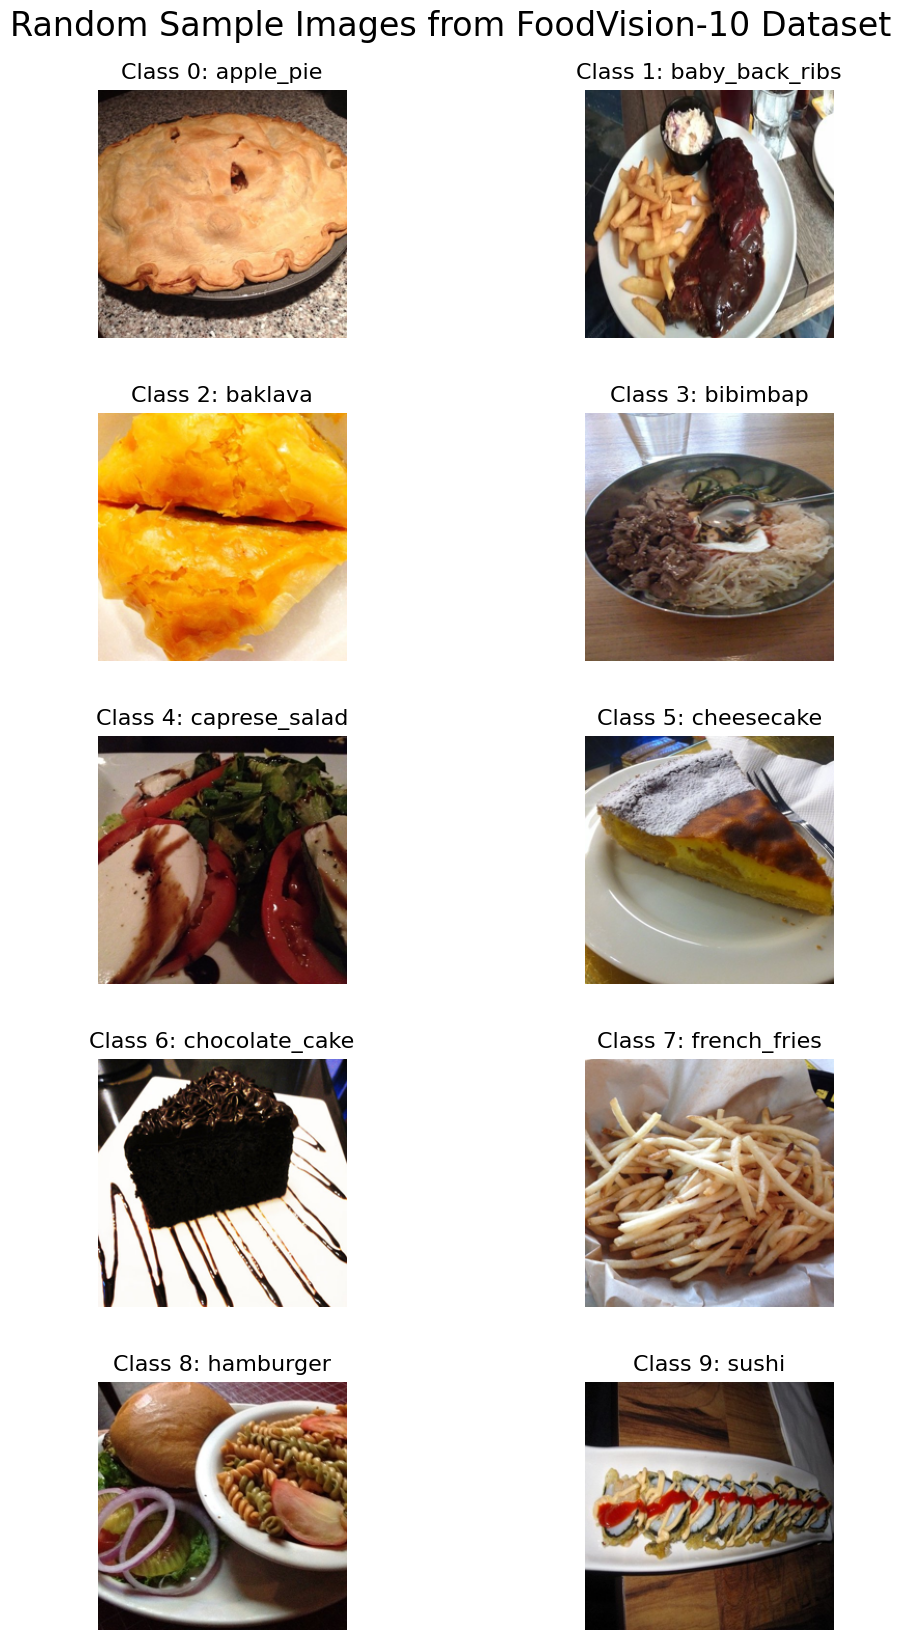

In [239]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Directory containing images
data_dir = "food_vision_10/train"

# List class folders
class_names = ["apple_pie", "baby_back_ribs", "baklava", "bibimbap", "caprese_salad", "cheesecake", 
               "chocolate_cake", "french_fries", "hamburger", "sushi"]

# Call the function
view_random_images_data_dir(data_dir, class_names)

### **Data Preprocessing Using the `tf.data` API**

In this project, we preprocess our dataset using TensorFlow's `tf.data` API to build an efficient and modular data pipeline.  
The preprocessing pipeline involves resizing, data augmentation, batching, shuffling, and prefetching to ensure our data is optimized for both training and evaluation. These steps are crucial for training both a custom CNN and a transfer learning model (EfficientNetB0).  
Below is an explanation of each step:

1. **Resizing**:  
   During dataset loading, all images are resized to a fixed size of `224x224` using the `image_size` parameter in `image_dataset_from_directory`. This size is required for compatibility with both the custom CNN and the EfficientNetB0 model.

2. **Data Augmentation**:  
   For the training dataset, random transformations (e.g., flipping, rotation, zooming, height adjustment, and width adjustment) are applied using a data augmentation layer. This step artificially expands the dataset and improves model generalization.  
Note: Data augmentation is **not applied** to the validation dataset to ensure consistent evaluation.

4. **Batching**:  
   After preprocessing, images and labels are grouped into fixed-size batches (`batch_size=32`). Batching allows efficient training by leveraging parallelism on GPUs.

5. **Shuffling**:  
   The training dataset is shuffled before batching to ensure that the model sees a varied distribution of samples in each epoch. This reduces the risk of overfitting to the data order.

6. **Prefetching**:  
   Prefetching loads the next batch of data while the current batch is being processed by the model. This overlapping of data loading and computation improves pipeline performance, especially on GPUs.

---

**Note on Scaling**:  
We are not performing scaling during the preprocessing stage because our two models require different approaches:
- For the **custom CNN**, we include a scaling layer inside the model to normalize pixel values to `[0, 1]`.
- For the **EfficientNetB0** model (used in transfer learning), scaling is already built into the architecture, and it expects raw pixel values in the range `[0, 255]`.

This approach avoids redundant preprocessing and ensures compatibility with both models.

---

### Code Highlights
- **Dataset Loading**: Resizing happens during dataset loading using `image_dataset_from_directory`.
- **Augmentation**: Augmentation is applied only to training data using a custom preprocessing function.
- **Optimization**: The pipeline uses `tf.data.AUTOTUNE` for efficient parallel processing and prefetching.

In [7]:
# Paths to the train and validation directories:
train_dir = "food_vision_10/train/"
validation_dir = "food_vision_10/test/"
class_names=['apple_pie', 'baby_back_ribs', 'baklava', 'bibimbap', 'caprese_salad',
                 'cheesecake', 'chocolate_cake', 'french_fries', 'hamburger', 'sushi']

In [8]:
import numpy as np

def create_dataset_from_directory(directory, class_names):
    dataset_images = []
    dataset_labels = []

    for idx, class_name in enumerate(class_names):
        label = idx  # Ensure label matches the index of the class
        class_path = os.path.join(directory, class_name)
        for file in sorted(os.listdir(class_path)):
            file_path = os.path.join(class_path, file)
            try:
                img = tf.keras.utils.load_img(file_path, target_size=(224, 224))
                img = tf.keras.utils.img_to_array(img)
                dataset_images.append(img)
                dataset_labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

    return np.array(dataset_images, dtype=np.float32), np.array(dataset_labels, dtype=np.int32)

train_images, train_labels = create_dataset_from_directory(train_dir, class_names)
val_images, val_labels = create_dataset_from_directory(validation_dir, class_names)

In [9]:
print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)

(7500, 224, 224, 3) (7500,)
(2500, 224, 224, 3) (2500,)


In [10]:
print(val_labels)

[0 0 0 ... 9 9 9]


In [218]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness

# Paths to the train and validation directories:
train_dir = "food_vision_10/train/"
validation_dir = "food_vision_10/test/"

# Batch size
BATCH_SIZE = 32

# Step #1: Load train and validation datasets:
raw_train_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(224, 224),  # resize images
    batch_size=None,  # Defer batching to later in the pipeline for better control
    shuffle=False  # Shuffling will be handled explicitly later in the pipeline
)

raw_validation_data = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    image_size=(224, 224),  # resize images
    batch_size=None,  # Defer batching to later in the pipeline for better control
    shuffle=False  # Validation data is not shuffled to maintain consistency
)


# # Step #2: Data augmentation layer:
# data_augmentation_layer = Sequential([
#     RandomFlip("horizontal"),  # Randomly flip images horizontally
#     RandomRotation(0.2),       # Randomly rotate images
#     RandomZoom(0.2),           # Randomly zoom into images
#     RandomContrast(0.2),       # Randomly adjust contrast
#     RandomBrightness(0.2)      # Rndomly adjust brightness
# ])

# Step #3: Define preprocessing function
def preprocess_image(image, label, image_shape=224):
    """
    Reshapes image to [image_shape, image_shape, color_channels] and normalizes it
    """
    image = tf.image.resize(image, [image_shape, image_shape])  # Reshape to (224, 224)
    return image, label
# Step 4: Get train_data ready for training

# Map preprocessing function to training data (and parallelize)
train_data = raw_train_data.map(
    map_func=preprocess_image,
    num_parallel_calls=tf.data.AUTOTUNE  # Parallel mapping
)

# Shuffle train_data, turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


# Step 5: Get validation_data ready for training

# Map preprocessing function to validation data (and parallelize)
validation_data = raw_validation_data.map(
    map_func=preprocess_image,
    num_parallel_calls=tf.data.AUTOTUNE)  # Parallel mapping

# Turn validation data into batches (don't need to shuffle)
validation_data = validation_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# NOTE: 
# - Training data is shuffled to ensure the model sees a varied distribution of samples in each epoch, 
#   which helps improve generalization.
# - Validation data is not shuffled to maintain consistency and reproducibility during evaluation.

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## 3. **Part 1: Building Custom CNN Models**

In this part, We build multiple CNN models from scratch to classify images into 10 categories from the `food_vision_10` dataset.  
Each model includes adjustments to **hyperparameters** and **architecture** in order to improve performance and generalization.  
The goal of this part is to experiment with and analyze different architectural choices and their impact on the results.


### **Model 1: Base Architecture**

The architecture of `model_1` is designed for a 10-class classification task using the dataset `food_vision_10`.  
The model consists of the following main components:

1. **Input Layer:** Accepts input images of size 224x224x3 (RGB).
2. **Data Augmentation Layer:** Performs preprocessing on the images, including:
   - Random horizontal flips.
   - Random rotations (up to 20%).
   - Random zooms (up to 20%).
   - Random adjustments of contrast and brightness.
3. **Rescaling Layer:** Normalizes pixel values to the range `[0, 1]` instead of `[0, 255]`.
4. **Four Convolutional Blocks with Batch Normalization:**
   - Each block contains a `Conv2D` layer with ReLU activation, Batch Normalization, and MaxPooling to downsample the feature maps.
   - The fourth block uses 256 filters.
5. **Flatten Layer:** Flattens the feature maps into a vector for the dense layers.
6. **Two Dense Layers:**
   - The first dense layer has 256 neurons and applies a 50% dropout rate.
   - The second dense layer has 128 neurons and applies a 50% dropout rate.
7. **Output Layer:** A softmax layer for classification into 10 categories.

#### Goals of the Model:
- To build a basic CNN large enough to capture the features of the images.
- To prevent overfitting by applying Dropout and Batch Normalization.

In [90]:
from tensorflow.keras import layers, Sequential

In [149]:
from tensorflow.keras import Sequential, layers

data_augmentation_layer = Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),       # Randomly rotate images
    RandomZoom(0.2),           # Randomly zoom into images
    RandomContrast(0.2),       # Randomly adjust contrast
    RandomBrightness(0.2)      # Rndomly adjust brightness
], name="data_augmentation_layer")

model_1 = Sequential([
    # Input layer
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer
    data_augmentation_layer,
    
    # Rescaling layer to normalize pixel values to the range of [0, 1]
    layers.Rescaling(scale=1.0/255, name='Rescaling'),

    # First Convolutional block with Batch Normalization
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_1'),
    layers.BatchNormalization(name='BN_1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_1'),

    # Second Convolutional block with Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_2'),
    layers.BatchNormalization(name='BN_2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_2'),

    # Third Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_3'),
    layers.BatchNormalization(name='BN_3'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_3'),

    # Fourth Convolutional block with Batch Normalization
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_4'),
    layers.BatchNormalization(name='BN_4'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_4'),

    # Flatten layer to prepare for dense layers
    layers.Flatten(name="Flatten"),

    # First Dense layer with Batch Norm and Dropout
    layers.Dense(units=256, activation='relu', name='Dense_1'),
    layers.BatchNormalization(name='BN_5'),
    layers.Dropout(0.5, name='Dropout_1'),

    # Second Dense layer with Batch Norm and Dropout
    layers.Dense(units=128, activation='relu', name='Dense_2'),
    layers.BatchNormalization(name='BN_6'),
    layers.Dropout(0.5, name='Dropout_2'),

    # Output layer
    layers.Dense(units=10, activation='softmax', name='Output')  # Output for 10 classes
], name="model_1")

In [150]:
# Model Summary
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_3 (MaxPooling2D)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 28, 28, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_4 (MaxPooling2D)     │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_5 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_6 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,271,370 (50.63 MB)

 Trainable params: 13,269,642 (50.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

Compile the model

In [151]:
# Compile model_1
# initial_learning_rate = 0.005
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=10000, decay_rate=0.99, staircase=True
# )

model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.005),  # Learining rate = 0.05
               metrics=['accuracy'])

#### **Callbacks**

1. **EarlyStopping:**
   - Stops training if validation loss (`val_loss`) doesn't improve for 5 epochs.
   - Restores the best weights to avoid overfitting.

2. **ModelCheckpoint:**
   - Saves the best model based on validation loss (`val_loss`).
   - Ensures only the most performant model is retained.

3. **ReduceLROnPlateau:**
   - Reduces learning rate by 0.8 if validation loss stagnates for 3 epochs.
   - Helps the model converge more smoothly.

In [152]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',         # Metric to monitor
    factor=0.8,                 # Factor to reduce the learning rate (new_lr = lr * factor)
    patience=3,                 # Number of epochs with no improvement before reducing
    min_lr=1e-6,                # Minimum learning rate
    verbose=1                   # Print updates
)

#### **Hardware Setup**

Before training the model, it's crucial to verify that we are utilizing the GPU for computation. GPUs significantly accelerate the training process, especially for deep learning tasks that involve large datasets and complex models. 

The following code ensures that a GPU is detected and will be used:

In [153]:
gpu_devices = tf.config.list_physical_devices('GPU')
print("Training will be performed on:", "GPU" if gpu_devices else "CPU")

Training will be performed on: GPU


#### **Training**

- **Epochs:** 20 maximum, with early stopping to prevent overfitting.
- **Validation Data:** Used to monitor performance and adjust callbacks.
- **Callbacks:**
  - `EarlyStopping`: Stops training if validation loss doesn't improve.
  - `ModelCheckpoint`: Saves the best model during training.
  - `ReduceLROnPlateau`: Adjusts learning rate when validation loss stagnates.

In [154]:
model_1_history= model_1.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr],
)

print("Training Complete!")

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.4338 - loss: 2.0787
Epoch 1: val_loss improved from inf to 2.70904, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 233ms/step - accuracy: 0.4338 - loss: 2.0783 - val_accuracy: 0.1800 - val_loss: 2.7090 - learning_rate: 0.0050
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.3622 - loss: 2.2115
Epoch 2: val_loss did not improve from 2.70904
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 235ms/step - accuracy: 0.3624 - loss: 2.2102 - val_accuracy: 0.1632 - val_loss: 3.1318 - learning_rate: 0.0050
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.3789 - loss: 2.0424
Epoch 3: val_loss did not improve from 2.70904
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 232ms/step - accuracy: 0.3791 - loss: 2.0411 - val_accuracy: 0.1688 - val_loss: 3.1224 - learning_rate: 0.0050
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.3883 - loss: 1.9237
Epoch 4: val_loss did not improve from 2.

#### **Model_1 Evaluation**

In this section, we evaluate the performance of model_1 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [162]:
from helper_functions import model_evaluation

In [168]:
# Extract images and labels from validation_data
images, labels = [], []

# Use as_numpy_iterator to iterate over batches
for batch_images, batch_labels in validation_data.as_numpy_iterator():
    images.extend(batch_images)  # Already NumPy arrays
    labels.extend(batch_labels)  # Already NumPy arrays

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

2024-12-23 17:43:24.409314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [197]:
# model predictions
y_pred_probs = model_1.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


In [198]:
from sklearn.metrics import classification_report

print(classification_report(labels, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       250
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00       250
           5       0.06      0.04      0.05       250
           6       0.28      0.56      0.38       250
           7       0.21      0.70      0.33       250
           8       0.10      0.16      0.12       250
           9       0.14      0.33      0.20       250

    accuracy                           0.18      2500
   macro avg       0.08      0.18      0.11      2500
weighted avg       0.08      0.18      0.11      2500



In [200]:
model_1_results = model_evaluation(labels, y_pred)
model_1_results

/Users/orshwartzman/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.18,
 'precision': 0.07980837266977914,
 'recall': 0.18,
 'f1-score': 0.10752657181247262}

The classification report shows poor performance, with many classes receiving 0 precision, recall, and F1-scores, indicating the model struggles to correctly predict several categories. To address this, we will fine-tune the hyperparameters and explore improvements in the model architecture to achieve better results.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

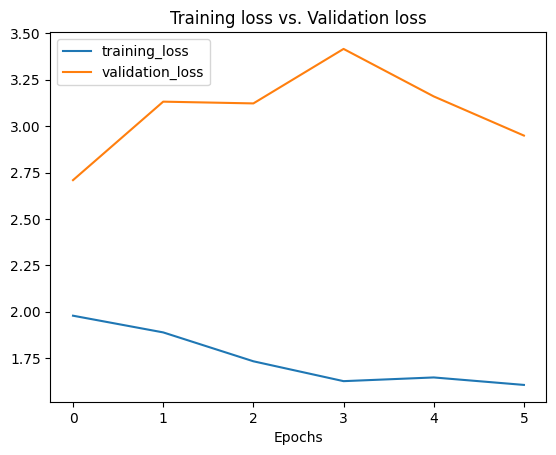

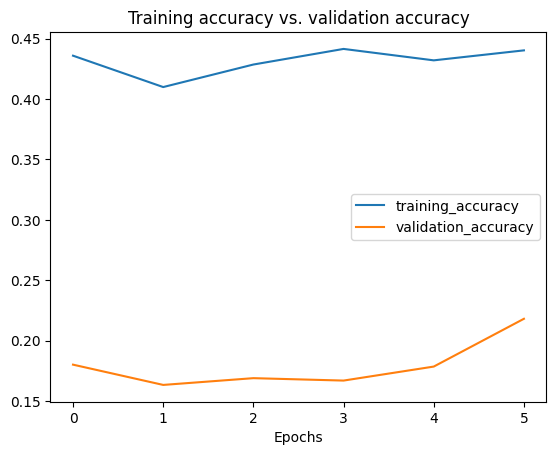

In [155]:
plot_training_curves(model_1_history)

The training loss decreases steadily, while the validation loss remains significantly higher and fluctuates, indicating potential overfitting. Additionally, the gap between training and validation accuracy suggests that the model is learning the training data well but struggles to generalize to the validation dataset.

### Model 2: Improved Learning with a Lower Learning Rate

In `model_2`, the only change compared to `model_1` is the adjustment of the learning rate in the Adam optimizer:
- **In `model_1`:** The learning rate was `0.005`.
- **In `model_2`:** The learning rate was reduced to `0.001`.

#### Impact of the Change:
- A lower learning rate allows the model to learn more gradually, reducing the risk of instability during training.
- This adjustment led to a significant improvement in the model's performance, particularly in its ability to generalize to the validation dataset.

In [113]:
from tensorflow.keras import Sequential, layers

data_augmentation_layer = Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),       # Randomly rotate images
    RandomZoom(0.2),           # Randomly zoom into images
    RandomContrast(0.2),       # Randomly adjust contrast
    RandomBrightness(0.2)      # Rndomly adjust brightness
], name="data_augmentation_layer")

model_2 = Sequential([
    # Input layer
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer
    data_augmentation_layer,
    
    # Rescaling layer to normalize pixel values to the range of [0, 1]
    layers.Rescaling(scale=1.0/255, name='Rescaling'),

    # First Convolutional block with Batch Normalization
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_1'),
    layers.BatchNormalization(name='BN_1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_1'),

    # Second Convolutional block with Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_2'),
    layers.BatchNormalization(name='BN_2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_2'),

    # Third Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_3'),
    layers.BatchNormalization(name='BN_3'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_3'),

    # Fourth Convolutional block with Batch Normalization
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_4'),
    layers.BatchNormalization(name='BN_4'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_4'),

    # Flatten layer to prepare for dense layers
    layers.Flatten(name="Flatten"),
    # layers.GlobalAveragePooling2D(name="Global_Average_pooling_2D"),

    # First Dense layer with Batch Norm and Dropout
    layers.Dense(units=256, activation='relu', name='Dense_1'),
    layers.BatchNormalization(name='BN_5'),
    layers.Dropout(0.5, name='Dropout_1'),

    # Second Dense layer with Batch Norm and Dropout
    layers.Dense(units=128, activation='relu', name='Dense_2'),
    layers.BatchNormalization(name='BN_6'),
    layers.Dropout(0.5, name='Dropout_2'),

    # Output layer
    layers.Dense(units=10, activation='softmax', name='Output')  # Output for 10 classes
], name="model_2")

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['accuracy'])

In [191]:
# Model Summary
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_3 (MaxPooling2D)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 28, 28, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_4 (MaxPooling2D)     │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_5 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_6 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810,656 (151.87 MB)

 Trainable params: 13,269,642 (50.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

 Optimizer params: 26,539,286 (101.24 MB)

#### **Training**

- **Epochs:** 20 maximum, with early stopping to prevent overfitting.
- **Validation Data:** Used to monitor performance and adjust callbacks.
- **Callbacks:**
  - `EarlyStopping`: Stops training if validation loss doesn't improve.
  - `ModelCheckpoint`: Saves the best model during training.
  - `ReduceLROnPlateau`: Adjusts learning rate when validation loss stagnates.

In [114]:
model_2_history= model_2.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr],
)

print("Training Complete!")

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.3202 - loss: 2.6315
Epoch 1: val_loss improved from 2.89793 to 2.67062, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 247ms/step - accuracy: 0.3201 - loss: 2.6314 - val_accuracy: 0.1404 - val_loss: 2.6706 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.2629 - loss: 2.4481
Epoch 2: val_loss improved from 2.67062 to 2.24384, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 242ms/step - accuracy: 0.2629 - loss: 2.4476 - val_accuracy: 0.1972 - val_loss: 2.2438 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.2695 - loss: 2.2412
Epoch 3: val_loss improved from 2.24384 to 2.12024, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 235ms/step - accuracy: 0.2697 - loss: 2.2408 - val_accuracy: 0.2476 - val_loss: 2.1202 - learning_rate: 0.0010
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/

#### **Model_2 Evaluation**

In this section, we evaluate the performance of model_2 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [202]:
# model predictions
y_pred_probs = model_2.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       1.00      0.01      0.02       250
           2       0.00      0.00      0.00       250
           3       0.69      0.34      0.45       250
           4       0.70      0.29      0.41       250
           5       0.53      0.07      0.13       250
           6       0.41      0.76      0.54       250
           7       0.32      0.78      0.45       250
           8       0.16      0.55      0.24       250
           9       0.19      0.23      0.21       250

    accuracy                           0.30      2500
   macro avg       0.40      0.30      0.24      2500
weighted avg       0.40      0.30      0.24      2500



In [203]:
model_2_results = model_evaluation(labels, y_pred)
model_2_results

/Users/orshwartzman/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.302,
 'precision': 0.3994069623547457,
 'recall': 0.302,
 'f1-score': 0.24451026798275863}

Compared to Model_1, Model_2 demonstrates a noticeable improvement in performance, achieving an accuracy of 30% compared to Model_1's significantly lower results. Precision, recall, and F1-scores have improved for several classes (e.g., classes 6 and 7), with class 6 achieving a recall of 76% and class 7 reaching 78%. 

However, despite the improvement, some classes (e.g., 0, 1, 2) still have no correct predictions, highlighting that the model continues to struggle with these categories. While Model_2 benefits from better generalization due to a lower learning rate, further adjustments to the architecture and handling of class imbalances are necessary to achieve more consistent and balanced results.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

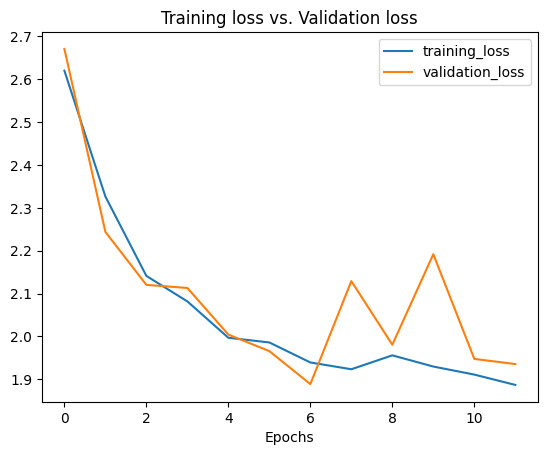

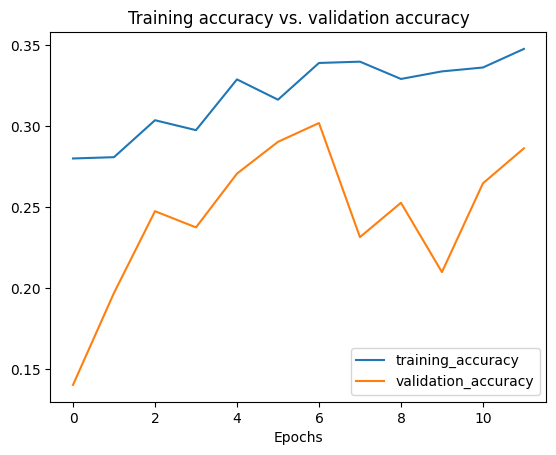

In [124]:
from helper_functions import plot_training_curves
plot_training_curves(model_2_history)

The training loss decreases steadily, while the validation loss fluctuates significantly, suggesting some instability in generalization. Although the validation accuracy shows improvement over time, it remains inconsistent compared to the smoother training accuracy curve, indicating potential overfitting or sensitivity to certain validation samples. Fine-tuning the model or improving regularization techniques may help stabilize the validation performance.

### Model 3: Reducing Capacity to Prevent Overfitting

In `model_3`, the fourth `Conv2D` layer was modified:
- **In `model_1` and `model_2`:** The fourth convolutional layer used 256 filters.
- **In `model_3`:** The number of filters in the fourth layer was reduced to 128.

#### Purpose of the Change:
- Reducing the number of filters decreases the capacity of the model.
- This adjustment helps prevent overfitting, particularly when working with a relatively small dataset like `food_vision_10`.

#### Impact of the Change:
- The reduced capacity helped the model generalize better by avoiding overfitting.
- This is reflected in slightly improved validation performance and a narrower gap between training and validation accuracy.

In [128]:
from tensorflow.keras import Sequential, layers

data_augmentation_layer = Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),       # Randomly rotate images
    RandomZoom(0.2),           # Randomly zoom into images
    RandomContrast(0.2),       # Randomly adjust contrast
    RandomBrightness(0.2)      # Rndomly adjust brightness
], name="data_augmentation_layer")

model_3 = Sequential([
    # Input layer
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer
    data_augmentation_layer,
    
    # Rescaling layer to normalize pixel values to the range of [0, 1]
    layers.Rescaling(scale=1.0/255, name='Rescaling'),

    # First Convolutional block with Batch Normalization
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_1'),
    layers.BatchNormalization(name='BN_1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_1'),

    # Second Convolutional block with Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_2'),
    layers.BatchNormalization(name='BN_2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_2'),

    # Third Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_3'),
    layers.BatchNormalization(name='BN_3'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_3'),

    # Fourth Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_4'),
    layers.BatchNormalization(name='BN_4'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_4'),

    # Flatten layer to prepare for dense layers
    layers.Flatten(name="Flatten"),
    # layers.GlobalAveragePooling2D(name="Global_Average_pooling_2D"),

    # First Dense layer with Batch Norm and Dropout
    layers.Dense(units=256, activation='relu', name='Dense_1'),
    layers.BatchNormalization(name='BN_5'),
    layers.Dropout(0.5, name='Dropout_1'),

    # Second Dense layer with Batch Norm and Dropout
    layers.Dense(units=128, activation='relu', name='Dense_2'),
    layers.BatchNormalization(name='BN_6'),
    layers.Dropout(0.5, name='Dropout_2'),

    # Output layer
    layers.Dense(units=10, activation='softmax', name='Output')  # Output for 10 classes
], name="model_3")

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['accuracy'])

In [192]:
# Model Summary
model_3.summary()

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_3 (MaxPooling2D)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 28, 28, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_4 (MaxPooling2D)     │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_5 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_6 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,296 (76.67 MB)

 Trainable params: 6,699,274 (25.56 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 13,398,550 (51.11 MB)

#### **Training**

- **Epochs:** 20 maximum, with early stopping to prevent overfitting.
- **Validation Data:** Used to monitor performance and adjust callbacks.
- **Callbacks:**
  - `EarlyStopping`: Stops training if validation loss doesn't improve.
  - `ModelCheckpoint`: Saves the best model during training.
  - `ReduceLROnPlateau`: Adjusts learning rate when validation loss stagnates.

In [130]:
model_3_history= model_3.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr],
)

print("Training Complete!")

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3374 - loss: 2.4829
Epoch 1: val_loss improved from inf to 2.91190, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 219ms/step - accuracy: 0.3373 - loss: 2.4829 - val_accuracy: 0.1116 - val_loss: 2.9119 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2644 - loss: 2.3903
Epoch 2: val_loss improved from 2.91190 to 2.24044, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 216ms/step - accuracy: 0.2646 - loss: 2.3898 - val_accuracy: 0.2124 - val_loss: 2.2404 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.2714 - loss: 2.2492
Epoch 3: val_loss improved from 2.24044 to 2.11138, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 217ms/step - accuracy: 0.2715 - loss: 2.2487 - val_accuracy: 0.2512 - val_loss: 2.1114 - learning_rate: 0.0010
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step

#### **Model_3 Evaluation**

In this section, we evaluate the performance of model_2 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [204]:
# model predictions
y_pred_probs = model_3.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       0.31      0.02      0.04       250
           3       0.89      0.24      0.37       250
           4       0.36      0.02      0.03       250
           5       0.47      0.24      0.32       250
           6       0.37      0.73      0.49       250
           7       0.37      0.90      0.53       250
           8       0.26      0.48      0.34       250
           9       0.27      0.79      0.40       250

    accuracy                           0.34      2500
   macro avg       0.33      0.34      0.25      2500
weighted avg       0.33      0.34      0.25      2500



In [205]:
model_3_results = model_evaluation(labels, y_pred)
model_3_results

/Users/orshwartzman/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.3412,
 'precision': 0.33202556892115787,
 'recall': 0.3412,
 'f1-score': 0.25233778989069877}

Model_3 shows a slight improvement over previous models, achieving an accuracy of 34%. The recall for certain classes (e.g., class 6 at 73% and class 9 at 79%) indicates better performance in specific categories. However, classes 0 and 1 remain completely unpredicted, with precision, recall, and F1-scores at 0.

While the overall performance has improved, the imbalance in class predictions persists, with several classes underrepresented in predictions. Further adjustments, such as better handling of class imbalance or architectural changes, are needed to achieve more consistent performance across all categories.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

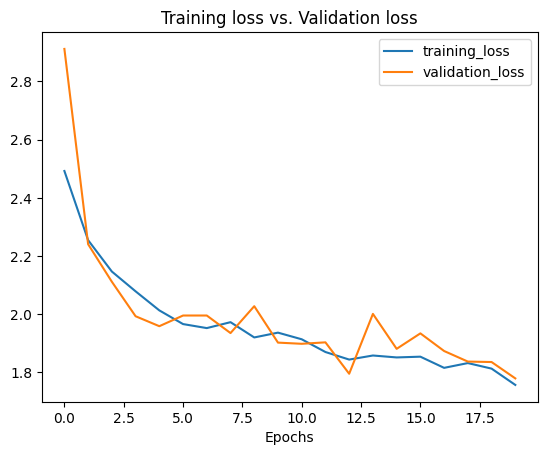

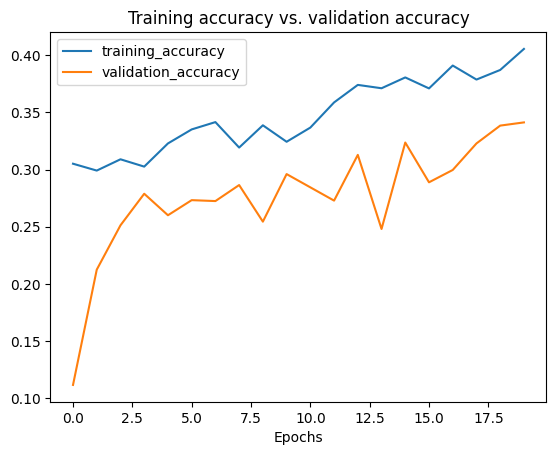

In [133]:
plot_training_curves(model_3_history)

**The training and validation loss curves show significant improvement compared to previous models, with both steadily decreasing.**  
However, there is still some fluctuation in the validation loss, suggesting instability in generalization across epochs. 

The training accuracy continues to improve consistently, while validation accuracy also shows an upward trend with occasional dips, indicating better performance but room for improvement.  
**These results suggest that while Model_3 generalizes better than its predecessors**, further tuning is necessary to stabilize validation metrics and close the gap between training and validation performance.

### Model 4: Switching from Flatten to GlobalAveragePooling

In `model_4`, a change was made in the transition from the convolutional layers to the dense layers:
- **In `model_1`, `model_2`, and `model_3`:** A `Flatten` layer was used to convert the feature maps into a single vector.
- **In `model_4`:** The `Flatten` layer was replaced with `GlobalAveragePooling2D`.

This model uses the same architecture as `model_3`, including the reduction to 128 filters in the fourth convolutional layer, but replaces the `Flatten` layer with `GlobalAveragePooling2D`.

#### Purpose of the Change:
- `GlobalAveragePooling2D` reduces the number of parameters in the model, minimizing the risk of overfitting.
- It focuses on the average value of features across each filter, instead of flattening the dimensions into a long vector.

#### Impact of the Change:
- While the model became lighter and easier to train, the reduced capacity led to slightly worse overall performance compared to `model_3`.
- The validation accuracy and loss showed more instability, indicating that `GlobalAveragePooling2D` may not have provided sufficient feature extraction capacity for this specific dataset.
- These results suggest that while `GlobalAveragePooling2D` helps reduce overfitting risk, it might not always be ideal for tasks requiring higher feature extraction capacity.

In [138]:
from tensorflow.keras import Sequential, layers

data_augmentation_layer = Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),       # Randomly rotate images
    RandomZoom(0.2),           # Randomly zoom into images
    RandomContrast(0.2),       # Randomly adjust contrast
    RandomBrightness(0.2)      # Rndomly adjust brightness
], name="data_augmentation_layer")

model_4 = Sequential([
    # Input layer
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer
    data_augmentation_layer,
    
    # Rescaling layer to normalize pixel values to the range of [0, 1]
    layers.Rescaling(scale=1.0/255, name='Rescaling'),

    # First Convolutional block with Batch Normalization
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_1'),
    layers.BatchNormalization(name='BN_1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_1'),

    # Second Convolutional block with Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_2'),
    layers.BatchNormalization(name='BN_2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_2'),

    # Third Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_3'),
    layers.BatchNormalization(name='BN_3'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_3'),

    # Fourth Convolutional block with Batch Normalization
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='Conv2D_4'),
    layers.BatchNormalization(name='BN_4'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MaxPooling_4'),

    # Flatten layer to prepare for dense layers
    # layers.Flatten(name="Flatten"),
    layers.GlobalAveragePooling2D(name="Global_Average_pooling_2D"),

    # First Dense layer with Batch Norm and Dropout
    layers.Dense(units=256, activation='relu', name='Dense_1'),
    layers.BatchNormalization(name='BN_5'),
    layers.Dropout(0.5, name='Dropout_1'),

    # Second Dense layer with Batch Norm and Dropout
    layers.Dense(units=128, activation='relu', name='Dense_2'),
    layers.BatchNormalization(name='BN_6'),
    layers.Dropout(0.5, name='Dropout_2'),

    # Output layer
    layers.Dense(units=10, activation='softmax', name='Output')  # Output for 10 classes
], name="model_4")

model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['accuracy'])

In [194]:
model_4.summary()

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_3 (MaxPooling2D)     │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 28, 28, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_4 (MaxPooling2D)     │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_2D       │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_5 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_6 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 930,016 (3.55 MB)

 Trainable params: 309,514 (1.18 MB)

 Non-trainable params: 1,472 (5.75 KB)

 Optimizer params: 619,030 (2.36 MB)

#### **Training**

- **Epochs:** 20 maximum, with early stopping to prevent overfitting.
- **Validation Data:** Used to monitor performance and adjust callbacks.
- **Callbacks:**
  - `EarlyStopping`: Stops training if validation loss doesn't improve.
  - `ModelCheckpoint`: Saves the best model during training.
  - `ReduceLROnPlateau`: Adjusts learning rate when validation loss stagnates.

In [141]:
model_4_history= model_4.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr],
)

print("Training Complete!")

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.2964 - loss: 2.6706
Epoch 1: val_loss improved from inf to 2.67706, saving model to best_model_4.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.2963 - loss: 2.6705 - val_accuracy: 0.0976 - val_loss: 2.6771 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2400 - loss: 2.4495
Epoch 2: val_loss improved from 2.67706 to 2.29605, saving model to best_model_4.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.2401 - loss: 2.4492 - val_accuracy: 0.1556 - val_loss: 2.2961 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.2391 - loss: 2.3338
Epoch 3: val_loss did not improve from 2.29605
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 207ms/step - accuracy: 0.2392 - loss: 2.3334 - val_accuracy: 0.1560 - val_loss: 2.3324 - learning_rate: 0.0010
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.2551 - loss: 2.2221

#### **Model_4 Evaluation**

In this section, we evaluate the performance of model_2 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [206]:
# model predictions
y_pred_probs = model_4.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       0.60      0.01      0.02       250
           3       0.53      0.28      0.37       250
           4       0.66      0.19      0.30       250
           5       0.29      0.32      0.31       250
           6       0.48      0.62      0.55       250
           7       0.28      0.85      0.42       250
           8       0.20      0.29      0.24       250
           9       0.23      0.51      0.31       250

    accuracy                           0.31      2500
   macro avg       0.33      0.31      0.25      2500
weighted avg       0.33      0.31      0.25      2500



In [207]:
model_4_results = model_evaluation(labels, y_pred)
model_4_results

/Users/orshwartzman/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.3088,
 'precision': 0.3266022856870673,
 'recall': 0.3088,
 'f1-score': 0.25134140871778554}

Model_4 achieves an accuracy of 31%, which is slightly lower than the 34% accuracy achieved by Model_3. While certain classes, such as class 7 (recall: 85%) and class 6 (recall: 62%), exhibit improved recall in Model_4, the overall macro and weighted averages for precision, recall, and F1-score are slightly worse compared to Model_3.

The use of `GlobalAveragePooling` in Model_4 seems to have reduced the model's capacity, leading to poorer performance for several classes (e.g., classes 0, 1, and 2 remain unpredicted). These results suggest that while `GlobalAveragePooling` simplifies the model, it may not provide sufficient feature extraction capacity for this task, especially given the dataset's complexity.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

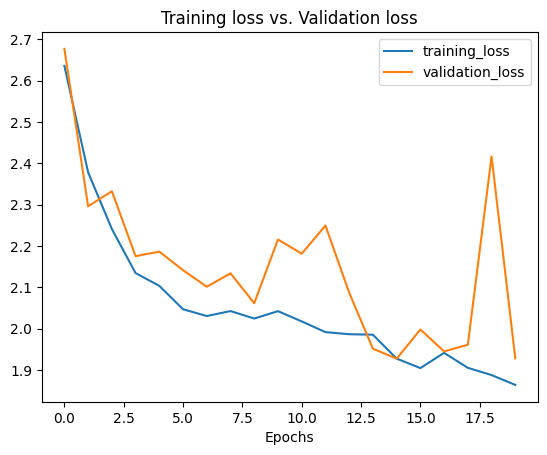

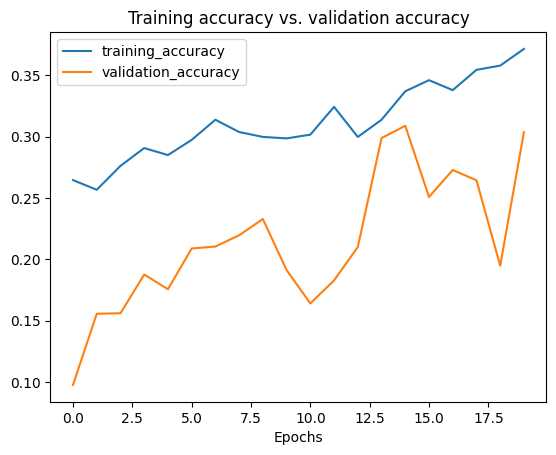

In [144]:
plot_training_curves(model_4_history)

The training loss steadily decreases over time, while the validation loss shows significant fluctuations, indicating instability in the model's generalization capabilities. The large spike in validation loss at later epochs suggests the model struggles to consistently learn from the validation data.

The training accuracy improves consistently, while the validation accuracy shows some improvement but remains volatile, with noticeable drops and fluctuations. These results suggest that the model may have reduced capacity due to the architectural change, making it less robust compared to previous models like Model_3. Fine-tuning the model or reintroducing capacity adjustments might help achieve better stability.

### **Models Comparison**

In [196]:
import pandas as pd

In [209]:
# Combine models' results into a Pandas DataFrame
models_results_df = pd.DataFrame({
    'Model_1': model_1_results,
    'Model_2': model_2_results,
    'Model_3': model_3_results,
    'Model_4': model_4_results,
})

In [211]:
models_results_df

,Model_1,Model_2,Model_3,Model_4
accuracy,0.180000,0.302000,0.341200,0.308800
precision,0.079808,0.399407,0.332026,0.326602
recall,0.180000,0.302000,0.341200,0.308800
f1-score,0.107527,0.244510,0.252338,0.251341


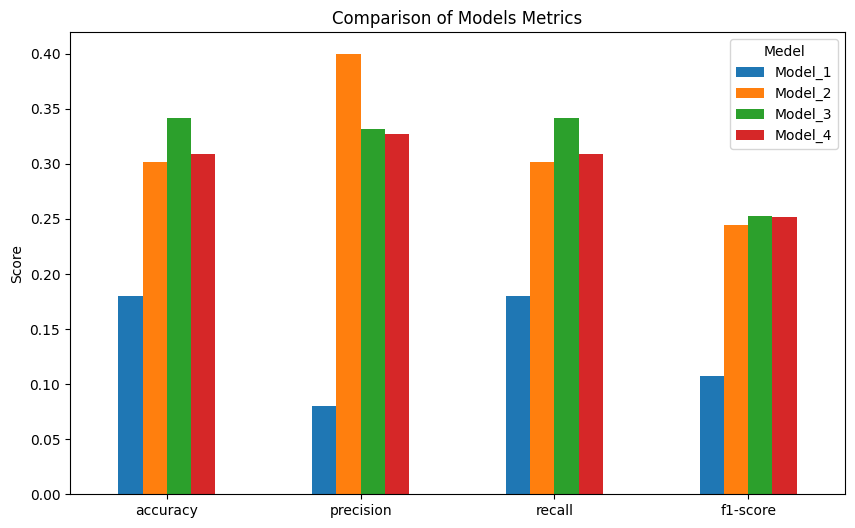

In [212]:
# Bar plot the comparison

models_results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Models Metrics")
plt.ylabel("Score")
plt.legend(title="Medel")
plt.xticks(rotation=0)
plt.show()

The bar chart provides a clear comparison of key performance metrics (accuracy, precision, recall, and F1-score) across all four models:

- **Model 1: Baseline Architecture**
  - The lowest performance across all metrics, with an accuracy of ~18%.
  - Poor precision, recall, and F1-score indicate the model struggled to learn meaningful patterns due to the high learning rate (`0.005`).

- **Model 2: Reduced Learning Rate**
  - Achieved a significant boost in accuracy (~30%) and recall compared to Model 1.
  - Delivered the highest precision among all models, indicating that when predictions were made, they were more likely to be correct.
  - However, overall performance was still limited by the inability to predict certain classes.

- **Model 3: Reduced Filters in the Fourth Convolutional Layer**
  - Delivered the highest overall performance in terms of accuracy (~34%), recall, and F1-score.
  - Precision was slightly lower than Model 2, but the balance across metrics suggests better generalization.
  - Reducing the number of filters in the fourth convolutional layer (from 256 to 128) improved the model's capacity and ability to generalize.

- **Model 4: Switching to GlobalAveragePooling**
  - Slightly underperformed compared to Model 3, with a marginally lower accuracy (~31%) and reduced precision and F1-score.
  - The use of `GlobalAveragePooling2D` reduced the parameter count and minimized overfitting risk but led to reduced feature extraction capacity, negatively impacting performance.
  - Still performed better than Model 1 and Model 2 in terms of recall and F1-score, but lacked the robustness of Model 3.

#### Conclusion and Next Steps

- The comparison highlights the gradual improvements achieved through fine-tuning and architectural adjustments.
- Model 3 emerged as the best-performing custom architecture, striking a balance across all metrics.
- In the next part, we will explore **transfer learning**, leveraging pretrained models to significantly enhance performance and address the limitations of these custom architectures with ease.

## 4. **Part 2: Using Transfer Learning**

After building and evaluating our custom CNN models in Part 1, we now proceed to Part 2, where we will leverage **transfer learning** to significantly enhance performance. Transfer learning involves using pre-trained models, which have already been trained on large datasets, as a starting point for our task. These models provide a robust feature extraction capability, enabling faster training and better generalization, especially when working with limited data.

### Goals of Part 2:
1. **Utilize Pre-trained Models:** Use state-of-the-art architectures, such as EfficientNetB0, fine-tuned to classify the 10 classes in our FoodVision-10 dataset.
2. **Compare Performance:** Evaluate transfer learning models against the custom CNNs from Part 1.
3. **Optimize Training:** Experiment with data augmentation and fine-tuning to maximize performance.

### Phases of Transfer Learning:
1. **EfficientNetB0 as a Feature Extractor (No Data Augmentation):**  
   - Use EfficientNetB0 with its pre-trained weights on ImageNet (`trainable=False`).  
   - Focus on leveraging its feature extraction capabilities without modifying the pre-trained layers.  
   - Establish a baseline performance.

2. **EfficientNetB0 as a Feature Extractor (With Data Augmentation):**  
   - Use the same setup as Phase 1 (`trainable=False`), but introduce a data augmentation layer before the base model.  
   - Data augmentation will enhance generalization by exposing the model to more varied input data.  
   - Evaluate the impact of data augmentation on performance.

3. **EfficientNetB0 with Fine-Tuning (Trainable=True for Last 10 Layers + Data Augmentation):**  
   - Fine-tune the last 10 layers of EfficientNetB0 (`trainable=True`) while freezing the rest of the layers.  
   - Retain data augmentation to prevent overfitting during fine-tuning.  
   - This phase aims to optimize the model further by allowing it to learn task-specific patterns.

### Expected Outcome:
By leveraging transfer learning in these three phases, we anticipate that the models will outperform the custom CNNs from Part 1 in terms of accuracy, precision, recall, and F1-score. Fine-tuning combined with data augmentation is expected to yield the best results, taking full advantage of EfficientNetB0's pre-trained capabilities while adapting it to the FoodVision-10 dataset.

Stay tuned as we explore each phase and push our classification results to the next level!

In [242]:
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNetB0
from tensorflow.keras import Sequential, layers

### EfficientNetB0 Parameters Explained

- **`include_top=False`**: Removes the classification layers, allowing customization for our task.  
- **`weights='imagenet'`**: Uses pre-trained ImageNet weights for feature extraction.  
- **`input_shape=(224, 224, 3)`**: Matches our preprocessed image size (224x224 RGB) to align with EfficientNet, pre-trained on ImageNet.  

In [286]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

To retain the pre-trained knowledge, we freeze the base model during the initial training

In [287]:
base_model.trainable = False

### **1. EfficientNetB0 as a Feature Extractor (No Data Augmentation)**

In this approach, **EfficientNetB0** is used as a fixed feature extractor with pre-trained ImageNet weights (`trainable=False`). This means its convolutional layers are frozen, and only the added layers are trained on the `food_vision_10` dataset. This setup allows the model to leverage the robust feature extraction capabilities of EfficientNetB0 while focusing on optimizing the classification task.

#### Feature Extraction Model Architecture

The feature extraction model is built on top of the `EfficientNetB0` base:
- **`GlobalAveragePooling2D`**: Reduces spatial dimensions, focusing on the most important features.
- **`Dropout`**: Adds regularization with a 50% dropout rate to prevent overfitting.
- **`Dense` Layer**: Final output layer with 10 neurons and a `softmax` activation, customized for the 10 classes in `food_vision_10`.

In [293]:
fe_model = Sequential([
    # Feature extractor: Pre-trained EfficientNetB0 used to extract meaningful features
    base_model,

    # Global Average Pooling: Reduces the spatial dimensions by averaging feature maps
    layers.GlobalAveragePooling2D(name="global_averaging_pooling_2d"),

    # Dropout: Adds regularization to reduce the risk of overfitting
    layers.Dropout(0.5, name="dropout"),

    # Output layer: Predicts probabilities for the 10 food classes using a softmax activation
    layers.Dense(units=10, activation="softmax", name="output_layer")
], name="fe_model")

In [294]:
fe_model.summary()

Model: "fe_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_averaging_pooling_2d     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

**Compile the model**

In [264]:
fe_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### **Callbacks**

1. **EarlyStopping:**
   - Stops training if validation loss (`val_loss`) doesn't improve for 5 epochs.
   - Restores the best weights to avoid overfitting.

2. **ModelCheckpoint:**
   - Saves the best model based on validation loss (`val_loss`).
   - Ensures only the most performant model is retained.

3. **ReduceLROnPlateau:**
   - Reduces learning rate by 0.8 if validation loss stagnates for 3 epochs.
   - Helps the model converge more smoothly.

In [265]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',         # Metric to monitor
    factor=0.8,                 # Factor to reduce the learning rate (new_lr = lr * factor)
    patience=3,                 # Number of epochs with no improvement before reducing
    min_lr=1e-6,                # Minimum learning rate
    verbose=1                   # Print updates
)

#### **Training**

The model is trained on the `train_data` with validation on `validation_data` for up to 20 epochs, focusing on achieving optimal performance while preventing overfitting.

- **Batch Size**: Set to 32, balancing computational efficiency and learning stability.
- **Optimizer**: The Adam optimizer dynamically adjusts learning rates, ensuring efficient convergence.
- **Loss Function**: Sparse Categorical Crossentropy is utilized for multi-class classification, aligning with the one-hot encoded labels in the `food_vision_10` dataset.

In [266]:
fe_model_history = fe_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr]
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5738 - loss: 1.3735
Epoch 1: val_loss improved from inf to 1.33683, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - accuracy: 0.5740 - loss: 1.3729 - val_accuracy: 0.5236 - val_loss: 1.3368 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6675 - loss: 0.9899
Epoch 2: val_loss improved from 1.33683 to 0.99944, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.6679 - loss: 0.9885 - val_accuracy: 0.6480 - val_loss: 0.9994 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7390 - loss: 0.7736
Epoch 3: val_loss improved from 0.99944 to 0.84267, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.7393 - loss: 0.7727 - val_accuracy: 0.7108 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 4/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

In [341]:
# Load the best weights into your model
fe_model.load_weights('best_model.keras')

#### **Feature Extraction Model Evaluation**

In this section, we evaluate the performance of model_2 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [342]:
# model predictions
y_pred_probs = fe_model.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

fe_model_results = model_evaluation(labels, y_pred)
fe_model_results

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step
              precision    recall  f1-score   support

           0       0.90      0.53      0.66       250
           1       0.98      0.79      0.88       250
           2       0.85      0.83      0.84       250
           3       0.98      0.91      0.94       250
           4       0.98      0.68      0.80       250
           5       0.76      0.78      0.77       250
           6       0.81      0.94      0.87       250
           7       0.94      0.97      0.96       250
           8       0.79      0.97      0.87       250
           9       0.62      0.97      0.76       250

    accuracy                           0.84      2500
   macro avg       0.86      0.84      0.83      2500
weighted avg       0.86      0.84      0.83      2500



{'accuracy': 0.8368,
 'precision': 0.8612231645486927,
 'recall': 0.8368,
 'f1-score': 0.8349664530545495}

#### Conclusions: Feature Extraction with EfficientNetB0 (No Data Augmentation)

The results from using EfficientNetB0 as a feature extractor show a **massive improvement** compared to our custom CNN models:
- **Accuracy**: Achieved 84%, a significant leap from the ~34% accuracy observed in the custom models.
- **Precision**: The macro average precision is 86%, indicating a balanced ability to avoid false positives across all classes.
- **Recall**: With a macro average of 84%, the model effectively captures true positives.
- **F1-Score**: The weighted F1-score of 83% highlights the model's robustness in balancing precision and recall.

By leveraging **EfficientNetB0 as a feature extractor**, the model benefited from pre-trained knowledge on ImageNet without requiring additional fine-tuning. While these results are impressive, there is still room for improvement in challenging classes (e.g., Class 0 and Class 9), suggesting that further steps like **data augmentation** or **fine-tuning** could enhance performance further.

This highlights the significant advantage of using feature extraction, especially when working with smaller datasets like FoodVision-10.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

In [269]:
from helper_functions import plot_training_curves

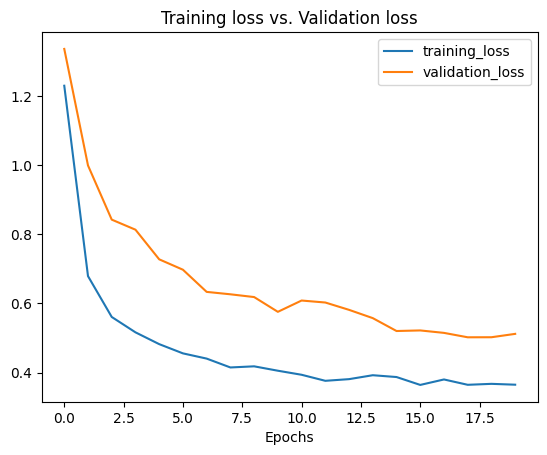

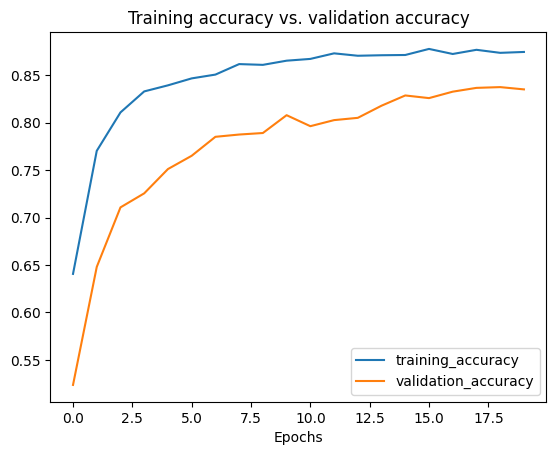

In [270]:
plot_training_curves(fe_model_history)

**Observations**

1. **Loss Trends:**
   - Training loss decreases consistently, while validation loss plateaus, indicating effective learning with minimal overfitting.

2. **Accuracy Trends:**
   - Training accuracy reaches ~85%, with validation accuracy around ~80%. The gap suggests minor overfitting.

3. **Insights:**
   - EfficientNetB0 as a feature extractor shows strong performance, significantly outperforming custom CNNs. Fine-tuning or data augmentation could further improve results.

### 2. EfficientNetB0 as a Feature Extractor with Data Augmentation

In this approach, **EfficientNetB0** is used as a fixed feature extractor with pre-trained ImageNet weights (`trainable=False`), while applying a **data augmentation layer** to enhance generalization. Data augmentation introduces variability in the training data, helping the model adapt better to unseen samples from the `food_vision_10` dataset.

In [313]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

### Feature Extraction with Data Augmentation Model Architecture

The feature extraction model is built on top of the `EfficientNetB0` base and includes a **data augmentation layer** for improved generalization:

- **`Data Augmentation Layer`**: Applies random transformations such as flipping, rotation, zoom, contrast, and brightness to introduce variability and help the model generalize better to unseen data.
- **`GlobalAveragePooling2D`**: Reduces spatial dimensions, focusing on the most important features.
- **`Dropout`**: Adds regularization with a 50% dropout rate to prevent overfitting.
- **`Dense` Layer**: Final output layer with 10 neurons and a `softmax` activation, customized for the 10 classes in `food_vision_10`.

In [377]:
data_augmentation_layer = Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.2),       # Randomly rotate images
    RandomZoom(0.2),           # Randomly zoom into images
], name="data_augmentation_layer")

fe_data_aug_model = Sequential([
    # Input layer: Defines the input shape of the images (224x224 with 3 color channels)
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer: Applies random transformations to enhance generalization
    data_augmentation_layer,

    # Feature extractor: Pre-trained EfficientNetB0 used to extract meaningful features
    base_model,

    # Global Average Pooling: Reduces the spatial dimensions by averaging feature maps
    layers.GlobalAveragePooling2D(name="global_averaging_pooling_2d"),

    # Dropout: Adds regularization to reduce the risk of overfitting
    layers.Dropout(0.5, name="dropout"),

    # Output layer: Predicts probabilities for the 10 food classes using a softmax activation
    layers.Dense(units=10, activation="softmax", name="output_layer")
])

**Compile the model**

In [378]:
fe_data_aug_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### **Callbacks**

In [379]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_fe_data_aug_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',         # Metric to monitor
    factor=0.8,                 # Factor to reduce the learning rate (new_lr = lr * factor)
    patience=3,                 # Number of epochs with no improvement before reducing
    min_lr=1e-6,                # Minimum learning rate
    verbose=1                   # Print updates
)

#### **Training**

The feature extraction model with data augmentation was trained on the `food_vision_10` dataset using the following setup:

- **Epochs = 25**: Increased from 20 (in the previous model) to allow the model to learn from the additional variability introduced by the data augmentation layer.
- **Batch Size**: Maintained as 32, balancing computational efficiency and model performance.
- **Optimizer**: Adam optimizer was used to efficiently adapt the learning rate during training.
- **Loss Function**: Sparse Categorical Crossentropy was used to handle multi-class classification tasks.
- **Callbacks**: The same callbacks as in the previous model were used.

This setup leveraged data augmentation to improve generalization while maintaining the same callback mechanisms for monitoring and optimization as the previous model.

In [317]:
fe_data_aug_model_history = fe_data_aug_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=25,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr]
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5554 - loss: 1.4819
Epoch 1: val_loss improved from inf to 1.38217, saving model to best_fe_data_aug_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 172ms/step - accuracy: 0.5556 - loss: 1.4813 - val_accuracy: 0.5012 - val_loss: 1.3822 - learning_rate: 0.0010
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6173 - loss: 1.2106
Epoch 2: val_loss improved from 1.38217 to 0.95310, saving model to best_fe_data_aug_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.6177 - loss: 1.2090 - val_accuracy: 0.6620 - val_loss: 0.9531 - learning_rate: 0.0010
Epoch 3/25
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6873 - loss: 0.9392
Epoch 3: val_loss improved from 0.95310 to 0.83627, saving model to best_fe_data_aug_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 153ms/step - accuracy: 0.6879 - loss: 0.9372 - val_accuracy: 0.7096 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 4/25
234/23

In [380]:
# Load the best weights into your model
fe_data_aug_model.load_weights('best_fe_data_aug_model.keras')

#### **Feature Extraction with Data Augmentation Model Evaluation**

In this section, we evaluate the performance of model_2 using the following metrics:

- **Accuracy**: Measures the overall correctness of the model's predictions.  
- **Precision**: Evaluates how many of the predicted positive results are true positives.  
- **Recall**: Assesses how well the model identifies all true positive cases.  
- **F1-Score**: A harmonic mean of precision and recall, balancing the two metrics.  

In [382]:
# model predictions
y_pred_probs = fe_data_aug_model.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

fe_data_aug_model_results = model_evaluation(labels, y_pred)
fe_data_aug_model_results

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step
              precision    recall  f1-score   support

           0       0.84      0.58      0.69       250
           1       0.97      0.84      0.90       250
           2       0.84      0.83      0.84       250
           3       0.98      0.91      0.94       250
           4       0.97      0.75      0.84       250
           5       0.78      0.75      0.76       250
           6       0.79      0.94      0.86       250
           7       0.93      0.96      0.95       250
           8       0.77      0.98      0.86       250
           9       0.73      0.94      0.82       250

    accuracy                           0.85      2500
   macro avg       0.86      0.85      0.85      2500
weighted avg       0.86      0.85      0.85      2500



{'accuracy': 0.848,
 'precision': 0.859452571872909,
 'recall': 0.848,
 'f1-score': 0.846012423664217}

#### **Conclusions: Feature Extraction Model with Data Augmentation**

The **feature extraction model with data augmentation** showed slight improvements compared to the **feature extraction model without data augmentation**:

**Key Metrics:**
- **Accuracy**: 
  - Improved from **83.6%** (without augmentation) to **84.8%**.
- **Precision**: 
  - Slightly decreased from **86.1%** to **85.9%**, maintaining robust predictions.
- **Recall**: 
  - Improved from **83.6%** to **85.0%**, indicating better identification of true positives across all classes.
- **F1-Score**: 
  - Increased from **83.5%** to **84.6%**, showcasing improved balance between precision and recall.

**Observations:**
- **Impact of Data Augmentation**: 
  - The use of data augmentation enhanced the model's ability to generalize, especially for underrepresented or complex variations in the data.
- **Class-Specific Improvements**: 
  - Noticeable gains were observed in recall and precision for several classes (e.g., Classes `1`, `4`, and `9`), reducing misclassifications.

**Conclusion:**
The incorporation of data augmentation resulted in improved performance across almost all major metrics. This highlights the importance of increasing data diversity through augmentation techniques, especially in scenarios with limited datasets.

#### **Training Analysis**

To understand the model's training process, we visualize the training and validation losses, as well as accuracies, across the epochs. These plots help identify patterns such as underfitting, overfitting, or stable learning.

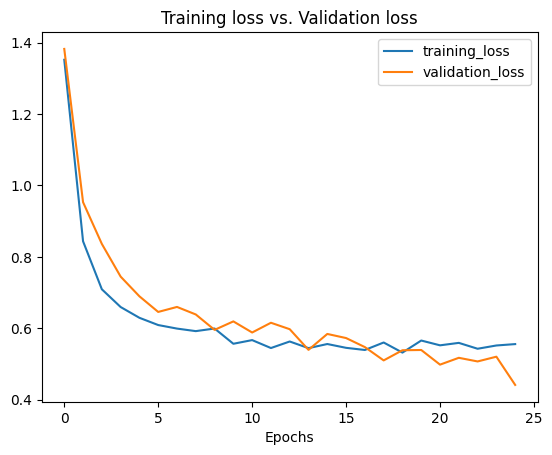

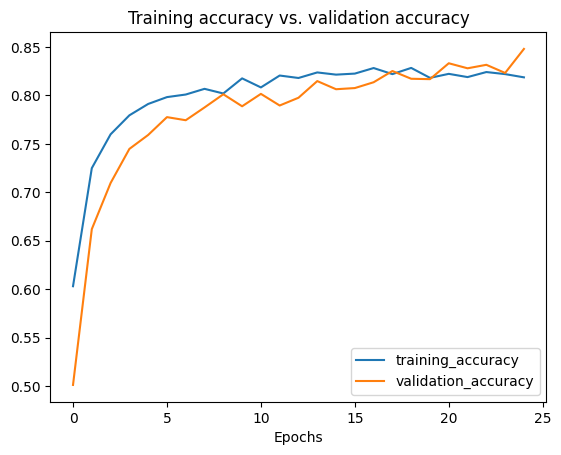

In [344]:
plot_training_curves(fe_data_aug_model_history)

**Observations:**
- **Training and Validation Loss:**
  - Both curves show a steady decrease during the first few epochs, indicating successful convergence of the model.
  - The validation loss closely follows the training loss, suggesting good generalization without significant overfitting.
  - A slight divergence occurs toward the end, which is common as the model stabilizes.  
  
- **Training and Validation Accuracy:**
  - Training accuracy improves rapidly in the initial epochs, reaching a plateau around epoch 10.
  - Validation accuracy closely tracks training accuracy, achieving comparable levels, demonstrating that the model is not overfitting.
  - Notable stability is observed in the accuracy curves, which further supports the efficacy of data augmentation in improving generalization.

**Conclusion:**
The incorporation of data augmentation has led to smooth and consistent training curves, with validation performance aligning closely with training. This indicates that data augmentation enhanced the model’s ability to generalize across diverse samples, reducing overfitting and ensuring stable performance throughout training.  
Fine-tuning the feature extractor (by unfreezing some layers of the base model) might yield even better results by allowing the model to adapt pre-trained weights to the specific dataset. We will explore this approach in our final model.  


### 3. EfficientNetB0 with Data Augmentation: Feature Extraction and Fine-Tuning (Two Phases)

In this final approach, **EfficientNetB0** is first used as a fixed feature extractor (`trainable=False`), leveraging pre-trained ImageNet weights while applying a **data augmentation layer** to enhance generalization. Instead of starting from scratch, the **best weights** from the previously trained feature extraction model (from the second approach) are loaded as the starting point for this method.

In the **fine-tuning phase**, the last few layers of the base model are unfrozen (`trainable=True`), allowing the model to adapt the pre-trained weights more specifically to the `food_vision_10` dataset. By reusing the pre-trained weights from the feature extraction phase, this approach reduces training time and builds on the progress already achieved, maximizing efficiency while aiming for improved performance.

### EfficientNetB0 with Data Augmentation and Fine-Tuning Model Architecture

The architecture of this model ('fine_tune_model') is identical to that of fe_data_aug_model.

In [425]:
# Extract the base model (EfficientNetB0) from the previously trained model (fe_data_aug_model)
# This base model is currently frozen (trainable=False)
fe_base_model = fe_data_aug_model.layers[1]  # Extract base_model (second layer in the Sequential model)

# Specify the number of layers to fine-tune in the base model
layers_to_fine_tune = 10

# Set the entire base model to be trainable to enable fine-tuning
fe_base_model.trainable = True

# Freeze all layers in the base model except the last 'layers_to_fine_tune' layers
# This prevents earlier layers from being updated, preserving their pre-trained weights
for layer in fe_base_model.layers[:-layers_to_fine_tune]:
    layer.trainable = False


# Optional for readers: uncomment this block to print each layer's name and its trainable status
# for layer in fe_base_model.layers:
#     print(layer.name, "Trainable:", layer.trainable)

In [426]:
data_augmentation_layer = fe_data_aug_model.layers[0]

fine_tune_model = Sequential([
    # Input layer: Defines the input shape of the images (224x224 with 3 color channels)
    layers.Input(shape=(224, 224, 3), name='Input_layer'),

    # Data augmentation layer: Applies random transformations to enhance generalization
    data_augmentation_layer,

    # Feature extractor: Pre-trained EfficientNetB0 used to extract meaningful features
    fe_base_model,

    # Global Average Pooling: Reduces the spatial dimensions by averaging feature maps
    layers.GlobalAveragePooling2D(name="global_averaging_pooling_2d"),

    # Dropout: Adds regularization to reduce the risk of overfitting
    layers.Dropout(0.5, name="dropout"),

    # Output layer: Predicts probabilities for the 10 food classes using a softmax activation
    layers.Dense(units=10, activation="softmax", name="output_layer")
], name="fine_tune_model")

In [427]:
# Load the best weights from the feature extraction model (fe_data_aug_model)
# This ensures we start fine-tuning from the best state achieved during feature extraction
fine_tune_model.load_weights('best_fe_data_aug_model.keras')

**Compile**

In [428]:
fine_tune_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

In [429]:
# Verify that the preloaded weights are correctly applied by evaluating the model on the validation data
fine_tune_model.evaluate(validation_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.7607 - loss: 0.6523


[0.4414844810962677, 0.8479999899864197]

In [430]:
fine_tune_model.summary()

Model: "fine_tune_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_layer         │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_averaging_pooling_2d     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 906,042 (3.46 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

#### **Callbacks**

In [432]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='fine_tune_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',         # Metric to monitor
    factor=0.8,                 # Factor to reduce the learning rate (new_lr = lr * factor)
    patience=3,                 # Number of epochs with no improvement before reducing
    min_lr=1e-6,                # Minimum learning rate
    verbose=1                   # Print updates
)

#### **Training**

In [433]:
fine_tune_model_history = fine_tune_model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr]
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4802 - loss: 1.9188
Epoch 1: val_loss improved from inf to 0.35976, saving model to fine_tune_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step - accuracy: 0.4807 - loss: 1.9165 - val_accuracy: 0.8784 - val_loss: 0.3598 - learning_rate: 1.0000e-05
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5140 - loss: 1.7740
Epoch 2: val_loss improved from 0.35976 to 0.34621, saving model to fine_tune_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 162ms/step - accuracy: 0.5144 - loss: 1.7721 - val_accuracy: 0.8812 - val_loss: 0.3462 - learning_rate: 1.0000e-05
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5310 - loss: 1.6217
Epoch 3: val_loss improved from 0.34621 to 0.33808, saving model to fine_tune_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 162ms/step - accuracy: 0.5314 - loss: 1.6201 - val_accuracy: 0.8848 - val_loss: 0.3381 - learning_rate: 1.0000e-05
Epoch 4/20
235/235 ━━━━━━━

#### **Fine Tuning Model Evaluation**

During training, we observed that the **training accuracy** appeared significantly lower than the **validation accuracy**. This discrepancy arises because training accuracy is calculated on each batch independently during training, rather than on the entire training dataset.

To ensure the model is not underfitting and performs well on the training data as a whole, we performed a more thorough evaluation. For this, we utilized the `model_evaluation` function to calculate key metrics (accuracy, precision, recall, and F1-score) on both the **training data** and the **validation data**, rather than only on the validation data as in previous models. 

This comprehensive evaluation confirms the model's robustness on both datasets.

**Evaluation on training data**

In [440]:
fine_tune_model.evaluate(train_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.8831 - loss: 0.3492


[0.3140904903411865, 0.8939999938011169]

Since `train_data` is shuffled, we extract labels directly from the unbatched dataset to ensure the labels are in the same order as the samples. This is essential for proper evaluation and comparison.

In [447]:
# Extract images and labels in the correct order from train_data
train_images_ordered = []
train_labels_ordered = []

# Iterate through the dataset while preserving the shuffled order
for batch_images, batch_labels in train_data.unbatch():
    train_images_ordered.append(batch_images.numpy())
    train_labels_ordered.append(batch_labels.numpy())

# Convert the lists to NumPy arrays
train_images_ordered = np.array(train_images_ordered)
train_labels_ordered = np.array(train_labels_ordered)

2024-12-26 18:30:23.116556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [450]:
# Model predictions on train_data
y_pred_train_probs = fine_tune_model.predict(train_images_ordered)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred_train = tf.argmax(y_pred_train_probs, axis=1)  
# Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(train_labels_ordered, y_pred_train, zero_division=0))
# Displays a detailed classification report comparing the predicted and true labels for the train data.

fine_tune_model_train_results = model_evaluation(train_labels_ordered, y_pred_train)
# Evaluates key metrics (accuracy, precision, recall, and F1-score) for the train data.

fine_tune_model_train_results
# Outputs the evaluation results for the train data.

235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       750
           1       0.92      0.93      0.93       750
           2       0.87      0.85      0.86       750
           3       0.96      0.97      0.97       750
           4       0.92      0.93      0.92       750
           5       0.84      0.82      0.83       750
           6       0.81      0.92      0.86       750
           7       0.96      0.95      0.96       750
           8       0.92      0.93      0.92       750
           9       0.94      0.84      0.88       750

    accuracy                           0.89      7500
   macro avg       0.90      0.89      0.89      7500
weighted avg       0.90      0.89      0.89      7500



{'accuracy': 0.894,
 'precision': 0.8951394380993437,
 'recall': 0.894,
 'f1-score': 0.8939210939640098}

**Train Data Evaluation Results**  
The fine-tuned model performs exceptionally well on the training data, achieving an accuracy of **89%** with high precision, recall, and F1-scores across all classes.

**Evaluation on validation data**

In [451]:
# model predictions
y_pred_probs = fine_tune_model.predict(validation_data)  
# The model outputs a probability distribution for each sample (10 probabilities, one for each class).

y_pred = tf.argmax(y_pred_probs, axis=1)  
# # Converts the probabilities into class predictions by selecting the index with the highest probability.

print(classification_report(labels, y_pred, zero_division=0))

fine_tune_model_results = model_evaluation(labels, y_pred)
fine_tune_model_results

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       250
           1       0.92      0.94      0.93       250
           2       0.84      0.86      0.85       250
           3       0.97      0.96      0.96       250
           4       0.92      0.92      0.92       250
           5       0.82      0.81      0.81       250
           6       0.81      0.90      0.85       250
           7       0.98      0.97      0.97       250
           8       0.91      0.93      0.92       250
           9       0.92      0.86      0.89       250

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



{'accuracy': 0.8872,
 'precision': 0.8874171463022281,
 'recall': 0.8872,
 'f1-score': 0.8868134848791928}

**Validation Data Evaluation Results**  
The fine-tuned model demonstrates excellent performance on the validation dataset with an accuracy of **88.7%**. Precision, recall, and F1-scores are consistently high across all classes, showing the model's ability to generalize well to unseen data. The results confirm that the fine-tuning phase effectively improved the model's classification performance while avoiding overfitting.

### **Models Comparison**

**1. Comparison Between Transfer Learning Models**  
In this section, we compare the performance of the three transfer learning models that utilized the pre-trained **EfficientNetB0** architecture:
1. **EfficientNetB0 as a Feature Extractor (No Data Augmentation)**: The base transfer learning model where the pre-trained EfficientNetB0 is used as a fixed feature extractor without any data augmentation.
2. **EfficientNetB0 as a Feature Extractor with Data Augmentation**: An improved version that incorporates a data augmentation layer to enhance generalization.
3. **EfficientNetB0 with Data Augmentation and Fine-Tuning**: The most advanced model, leveraging both data augmentation and fine-tuning the last layers of the feature extractor to adapt the pre-trained weights to our specific dataset.

The comparison will focus on metrics such as **accuracy**, **precision**, **recall**, and **F1-score** on the validation dataset. Additionally, we will evaluate how data augmentation and fine-tuning have contributed to improved performance in each subsequent model.

**2. Overall Project Comparison**  
Next, we extend the comparison to include all models used in the project:
- **Custom CNN Models**: From the initial manually designed models (e.g., basic CNN architecture) to more advanced CNNs designed to reduce overfitting and optimize performance.
- **Transfer Learning Models**: The three EfficientNetB0-based models highlighted above.

This comparison will showcase the significant improvements in performance achieved by incorporating transfer learning compared to the custom CNNs, demonstrating the power of pre-trained models on tasks like image classification.

Through this two-level comparison, we aim to summarize the progress made throughout the project and highlight the advantages of different approaches.

#### **1. Comparison Between Transfer Learning Models**

In [453]:
# Combine models' results into a Pandas DataFrame
models_tl_results_df = pd.DataFrame({
    'fe_model': fe_model_results,
    'fe_data_augmentation_model': fe_data_aug_model_results,
    'Fine_tuning_model': fine_tune_model_results,
})

In [454]:
models_tl_results_df

,fe_model,fe_data_augmentation_model,Fine_tuning_model
accuracy,0.836800,0.848000,0.887200
precision,0.861223,0.859453,0.887417
recall,0.836800,0.848000,0.887200
f1-score,0.834966,0.846012,0.886813


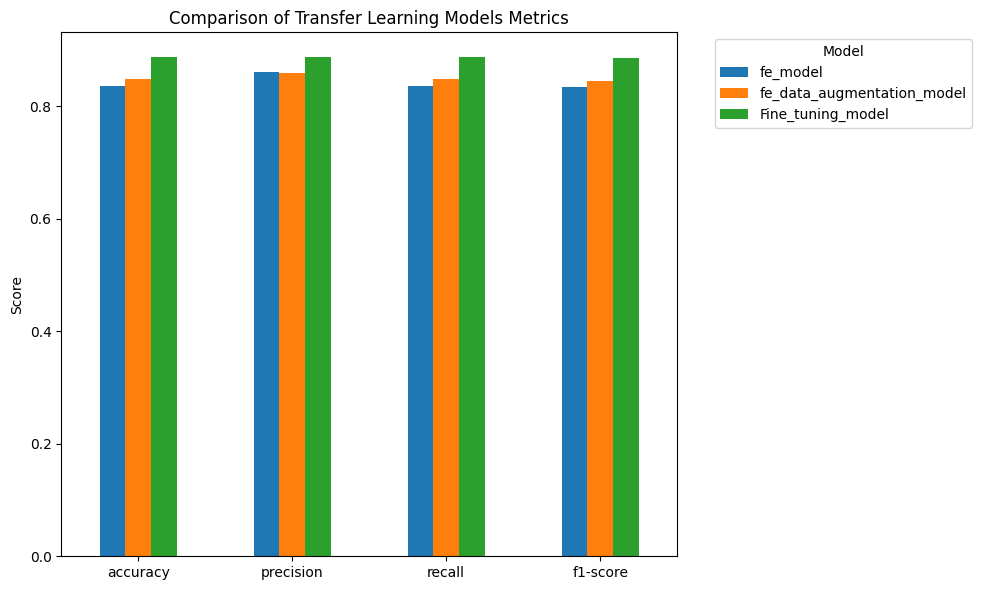

In [457]:
models_tl_results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Transfer Learning Models Metrics")
plt.ylabel("Score")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

**Comparison of Transfer Learning Models**

The bar plot illustrates the performance metrics (accuracy, precision, recall, and F1-score) across the three transfer learning approaches:
- **Feature Extraction Model (FE Model)**: Provided a strong baseline with robust metrics, demonstrating the value of transfer learning.
- **Feature Extraction with Data Augmentation**: Introduced data augmentation, which slightly improved generalization performance, as seen in marginally higher scores.
- **Fine-Tuning Model**: Achieved the best results across all metrics by unfreezing and fine-tuning the last layers of the pre-trained `EfficientNetB0` base. This allowed the model to adapt better to the `food_vision_10` dataset.

The gradual improvements highlight the increasing capability of each model to adapt and perform better on the dataset, with fine-tuning proving to be the most effective approach.

#### **2. Overall Project Comparison**

In [458]:
# Combine models' results into a Pandas DataFrame
all_models_results_df = pd.DataFrame({
    'Model_1': model_1_results,
    'Model_2': model_2_results,
    'Model_3': model_3_results,
    'Model_4': model_4_results,
    'fe_model': fe_model_results,
    'fe_data_augmentation_model': fe_data_aug_model_results,
    'Fine_tuning_model': fine_tune_model_results,
})

In [459]:
all_models_results_df

,Model_1,Model_2,Model_3,Model_4,fe_model,fe_data_augmentation_model,Fine_tuning_model
accuracy,0.180000,0.302000,0.341200,0.308800,0.836800,0.848000,0.887200
precision,0.079808,0.399407,0.332026,0.326602,0.861223,0.859453,0.887417
recall,0.180000,0.302000,0.341200,0.308800,0.836800,0.848000,0.887200
f1-score,0.107527,0.244510,0.252338,0.251341,0.834966,0.846012,0.886813


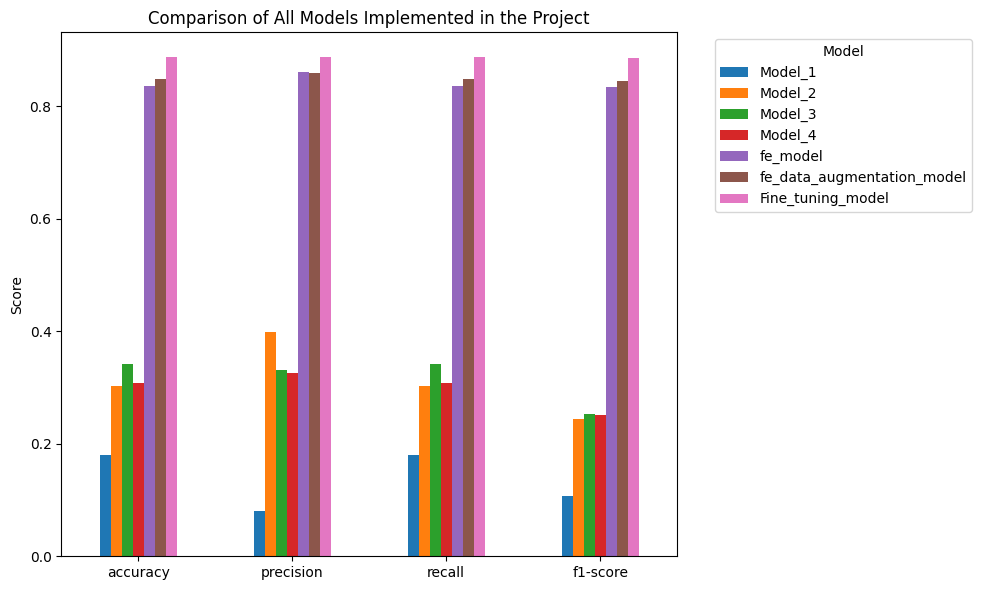

In [462]:
all_models_results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of All Models Implemented in the Project")
plt.ylabel("Score")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

**Comparison of All Models Implemented in the Project**

This bar plot showcases the performance metrics (accuracy, precision, recall, and F1-score) for all models implemented during the project. The progression from custom CNN models (`Model_1` to `Model_4`) to transfer learning models (`fe_model`, `fe_data_augmentation_model`, `Fine_tuning_model`) highlights significant improvements. The fine-tuning model stands out with the highest metrics, showcasing the advantage of combining feature extraction and fine-tuning with data augmentation.

## 5. **Project Conclusions and Final Thoughts**

### **Summary of Key Insights**
1. **Custom CNN Models**: Starting with custom CNN architectures, we explored how incremental modifications in architecture, learning rates, and pooling layers impact performance. These models served as a solid foundation for understanding model behavior but fell short in achieving high accuracy.
2. **Transfer Learning**: Leveraging pre-trained EfficientNetB0 showcased the power of transfer learning. The feature extraction model demonstrated significant improvements in accuracy and other metrics compared to custom CNNs, even without data augmentation.
3. **Data Augmentation**: Adding a data augmentation layer during training further enhanced generalization, resulting in modest performance gains across the board.
4. **Fine-Tuning**: The fine-tuning model, which combined feature extraction and unfreezing some of the pre-trained layers, delivered the best results. This step highlighted the importance of adapting pre-trained models to the specific dataset for optimal performance.

### **Key Takeaways**
- **Transfer Learning is Powerful**: Using pre-trained models significantly accelerates training and enhances performance, especially for datasets with limited size or diversity.
- **Fine-Tuning Offers the Best Results**: Carefully unfreezing layers of the pre-trained model allows for better adaptation to the dataset, achieving the highest metrics in accuracy, precision, recall, and F1-score.
- **Data Augmentation Helps Generalization**: Introducing variability in training data reduces overfitting and enhances model robustness on unseen data.

### **Final Thoughts**
This project demonstrated the step-by-step progression of improving image classification performance, from building custom CNNs to leveraging transfer learning and fine-tuning. While the fine-tuning model achieved the best results, the process underscored the importance of systematically experimenting with different architectures, hyperparameters, and strategies.

Future work could explore:
- **Different Pre-trained Architectures**: Experimenting with other state-of-the-art models like ResNet or MobileNet.
- **Hyperparameter Tuning**: Fine-tuning the optimizer, learning rate, and dropout rates for further performance improvements.
- **Additional Augmentation Techniques**: Exploring more complex data augmentation techniques to increase model robustness.

This structured approach ensures a deeper understanding of model behavior while maximizing performance.